# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
list_of_city_id = []
list_of_city_name = []
list_of_country = []
list_of_lng = []
list_of_lat = []
list_of_temp = []
list_of_humidity = []
list_of_clouds = []
list_wind_speed = []

# Looping through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        list_of_city_id.append(city_id)
            
        city_name = response_json['name']
        list_of_city_name.append(city_name)
        
        country_name = response_json['sys']['country']
        list_of_country.append(country_name)

        lng = response_json['coord']['lon']
        list_of_lng.append(lng)

        lat = response_json['coord']['lat']
        list_of_lat.append(lat)

        temp = response_json['main']['temp']
        list_of_temp.append(temp)

        humidity = response_json['main']['humidity']
        list_of_humidity.append(humidity)

        clouds = response_json['clouds']['all']
        list_of_clouds.append(clouds)

        wind_speed = response_json['wind']['speed']
        list_wind_speed.append(wind_speed)
        
        
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")


City Name: ushuaia, City ID: 3833367
City Name: svetlaya, City ID: 2015852
City Name: airai, City ID: 1651810
City Name: rikitea, City ID: 4030556
City Name: panguna, City ID: 2088659
City Name: zhanaozen, City ID: 607610
City Name: pevek, City ID: 2122090
City Name: touros, City ID: 3386213
City Name: port said, City ID: 358619
City Name: kalmar, City ID: 2702261
City Name: tuatapere, City ID: 2180815
City Name: busselton, City ID: 2075265
City Name: lingao, City ID: 1803560
City Name: ambilobe, City ID: 1082243
City Name: parrita, City ID: 3622537
City Name: moindou, City ID: 2140466
City Name: scarborough, City ID: 2638419
City Name: vestmannaeyjar, City ID: 3412093
City Name: fortuna, City ID: 5563839
City Name: bethel, City ID: 5282297
City Name: hobart, City ID: 2163355
That record does not exist, searching for next record...
That record does not exist, searching for next record...
City Name: pathein, City ID: 1328421
City Name: atuona, City ID: 4020109
City Name: carnarvon, City

City Name: flinders, City ID: 6255012
City Name: yenagoa, City ID: 2318123
City Name: mbale, City ID: 229278
City Name: noumea, City ID: 2139521
City Name: kollam, City ID: 1259091
City Name: la ronge, City ID: 6050066
City Name: dafeng, City ID: 1814435
City Name: torbay, City ID: 6167817
City Name: salekhard, City ID: 1493197
City Name: gawler, City ID: 2071059
City Name: tilichiki, City ID: 2120591
City Name: toba, City ID: 1850345
City Name: sorland, City ID: 3137469
That record does not exist, searching for next record...
City Name: talnakh, City ID: 1490256
City Name: lebu, City ID: 3883457
City Name: tuktoyaktuk, City ID: 6170031
City Name: inyonga, City ID: 159134
City Name: atambua, City ID: 1651103
City Name: rawlins, City ID: 5836068
City Name: hearst, City ID: 5973108
City Name: pinsk, City ID: 623549
City Name: kumba, City ID: 2229752
City Name: lorengau, City ID: 2092164
City Name: petropavlovsk-kamchatskiy, City ID: 2122104
City Name: saint-joseph, City ID: 6690296
City 

City Name: sola, City ID: 2134814
City Name: sheopur, City ID: 1256593
City Name: moorhead, City ID: 5038108
That record does not exist, searching for next record...
City Name: serebryansk, City ID: 1519395
City Name: maldonado, City ID: 3441890
City Name: sorong, City ID: 1626542
City Name: sainte-rose, City ID: 3578447
City Name: warrensburg, City ID: 4413595
City Name: mahibadhoo, City ID: 1337605
City Name: tooele, City ID: 5783695
City Name: tual, City ID: 1623197
City Name: nimes, City ID: 2990363
City Name: plouzane, City ID: 2986626
City Name: aripuana, City ID: 3665202
City Name: edd, City ID: 338345
City Name: berlevag, City ID: 780687
City Name: udachnyy, City ID: 2014624
City Name: avera, City ID: 4231997
City Name: gagret, City ID: 1271813
City Name: korla, City ID: 1529376
City Name: porto belo, City ID: 3452900
City Name: te anau, City ID: 2181625
City Name: san fernando, City ID: 1690039
City Name: leningradskiy, City ID: 2123814
City Name: port hedland, City ID: 206304

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Changing data into a dataframe
cities_data_df = pd.DataFrame({"City ID": list_of_city_id, "City": list_of_city_name, "Country": list_of_country, "Lat": list_of_lat, "Lng": list_of_lng,
                         "Temperature": list_of_temp, "Humidity": list_of_humidity, "Clouds": list_of_clouds,
                         "Wind Speed": list_wind_speed})
cities_data_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,3833367,Ushuaia,AR,-54.8000,-68.3000,49.66,71,75,0.00
1,2015852,Svetlaya,RU,46.5389,138.3297,52.16,69,1,8.99
2,1651810,Airai,TL,-8.9266,125.4092,60.91,91,100,2.80
3,4030556,Rikitea,PF,-23.1203,-134.9692,73.87,66,0,14.79
4,2088659,Panguna,PG,-6.3164,155.4848,68.97,95,64,1.97


In [6]:
# Save the result into cities.csv file
cities_data_df.to_csv("cities.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

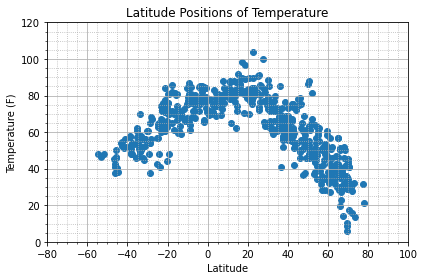

In [14]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Latitude Positions of Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 120)
plt.xlim(-80, 100)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

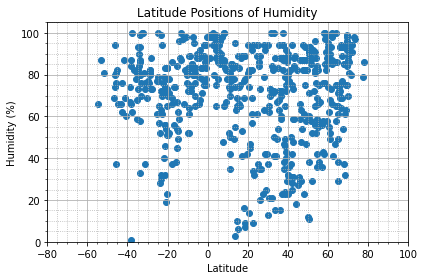

In [15]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Latitude Positions of Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-80, 100)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

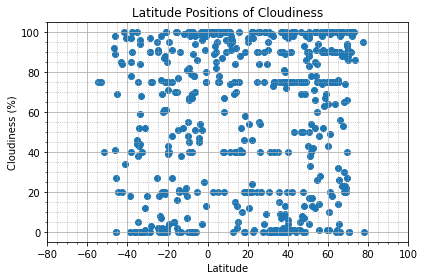

In [16]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Latitude Positions of Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-80, 100)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

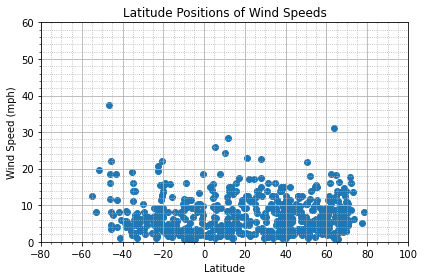

In [17]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Latitude Positions of Wind Speeds')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 60)
plt.xlim(-80, 100)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

## Linear Regression

In [32]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
   # plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

In [25]:
# Creating North and South Hemisphere DataFrames
data = cities_data_df['Lat'] > 0
north_hemisphere = cities_data_df[data]
south_hemisphere = cities_data_df[~data]
north_hemisphere.head()
south_hemisphere.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
1,6201424,Mataura,NZ,-46.1927,168.8643,37.58,94,89,11.68
4,3353540,Rehoboth,NA,-23.3167,17.0833,60.26,30,7,1.25
5,3395981,Maceió,BR,-9.6658,-35.7353,75.20,83,0,3.44
8,3466704,Castro,BR,-24.7911,-50.0119,56.64,79,2,2.08
9,2075265,Busselton,AU,-33.6500,115.3333,57.99,99,84,6.29


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8440911791858714


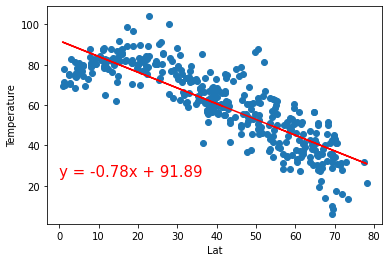

In [39]:
x_label = "Lat"
y_label = "Temperature"
label_position = (0,25)
plotLinearRegression(north_hemisphere[x_label],north_hemisphere[y_label],x_label,y_label,label_position,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7975218938050719


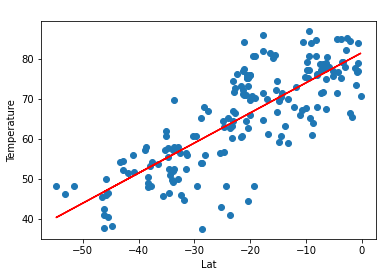

In [38]:
x_label = "Lat"
y_label = "Temperature"
label_positions = (-55,90)
plotLinearRegression(south_hemisphere[x_label],south_hemisphere[y_label],x_label,y_label,label_positions,6)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02849823669258952


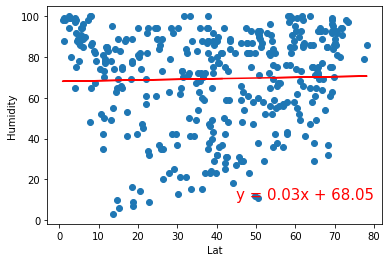

In [40]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_label = "Lat"
y_label = "Humidity"
label_positions = (45,10)
plotLinearRegression(north_hemisphere[x_label],north_hemisphere[y_label],x_label,y_label,label_positions,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12172514172245276


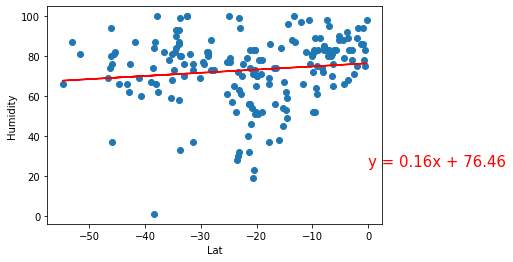

In [41]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_label = "Lat"
y_label = "Humidity"
label_positions = (-55,15)
plotLinearRegression(south_hemisphere[x_label],south_hemisphere[y_label],x_label,y_label,label_position,8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.025078161286507524


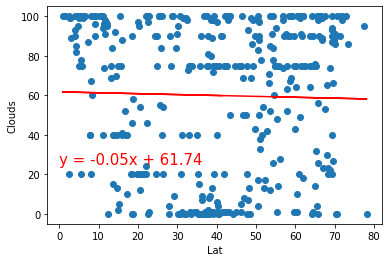

In [43]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_label = "Lat"
y_label = "Clouds"
label_positions = (20,40)
plotLinearRegression(north_hemisphere[x_label],north_hemisphere[y_label],x_label,y_label,label_position,9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10995470122907497


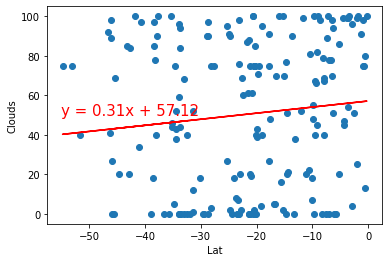

In [44]:
# Sourhern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_label = "Lat"
y_label = "Clouds"
label_position = (-55,50)
plotLinearRegression(south_hemisphere[x_label],south_hemisphere[y_label],x_label,y_label,label_position,10)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013535601793811539


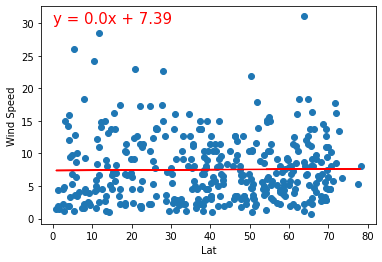

In [45]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_label = "Lat"
y_label = "Wind Speed"
label_position = (0,30)
plotLinearRegression(north_hemisphere[x_label],north_hemisphere[y_label],x_label,y_label,label_position,11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.21506106296907743


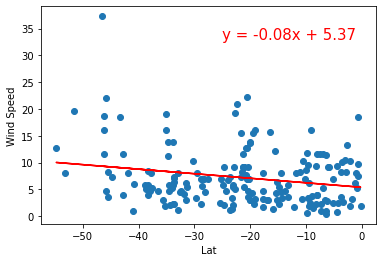

In [46]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_label = "Lat"
y_label = "Wind Speed"
label_positions = (-25,33)
plotLinearRegression(south_hemisphere[x_label],south_hemisphere[y_label],x_label,y_label,label_positions,12)

Observations
A. There seems to be a strong correlation between temperature and latitude. when you look at the linear regression it indicates 
   that all the plots are evenly distributed along the regression line.
B. There also seems to be a correlation between wind speed and latitude but that correlation is not that strong, because when 
   you look at the linear regression in the plots it shows that the plots are not evenly distributed.
C. There also seems to be little correlation between humidity and latitude. Though the regression line shows the plots are not
   evenly distibuted.